<a href="https://colab.research.google.com/github/bl00p1ng/Curso-Probabilidad-Data-Science/blob/main/%5BClase10%5DEstimacion_densidad_probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot
# Generador de números aleatorios básado en la distribución normal
from numpy.random import normal
from scipy.stats import norm

Generar datos artificiales para hacer las estimaciones:

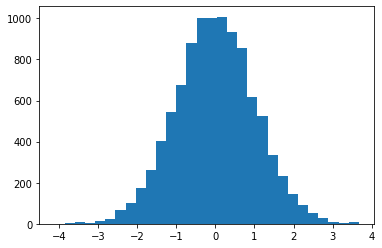

In [2]:
sample = normal(size = 10000)

pyplot.hist(sample, bins=30)
pyplot.show()

## Estimación paramétrica

`loc`: promedio

`scale`: desviación estándar.

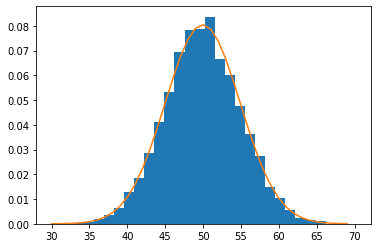

In [6]:
sample = normal(loc=50, scale=5, size=10000)  # mu = 50, sigma = 5

# Forzar los parámetros de la distribución normal
mu = sample.mean()
sigma = sample.std()

dist = norm(mu, sigma)

# Valores sobre los que se va a evaluar la función teórica
values = [value for value in range(30, 70)]

# Calcular probabilidades de los valores anteriores
probabilities = [dist.pdf(value) for value in values]

# Graficar ambas distribuciones para compararlas
pyplot.hist(sample, bins=30, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

# Estimación no paramétrica

`Kernel Density estimation` 
* [parámetro de suavizado]: smoothing parameter 
* [función base]: basis function

https://scikit-learn.org/stable/modules/density.html


In [8]:
from numpy import hstack  # Permite juntar arrays
from sklearn.neighbors import KernelDensity

# Construir la distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

Creando el modelo con Scikit Learn:

`bandwidth` es el parámetro de suavizado.

`kernel` es la función base.

In [10]:
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

KernelDensity(algorithm='auto', atol=0, bandwidth=2, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

Se usa la **probabilidad logarítmica** porque para el computador es más cómodo trabajar con logaritmos. Después de que se hace dicho computo se usa la exponecial para invertir las probabilidades y obtener los valores originales

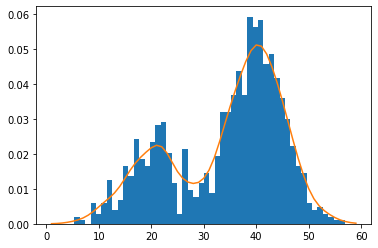

In [12]:
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)  # Probabilidad logarítmica
probabilities = np.exp(probabilities)  # Inversión de probabilidad

pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values, probabilities)
pyplot.show()